In [382]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


import warnings 
warnings.filterwarnings("ignore")

# Data Collection and Exploration :

In [334]:
df=pd.read_csv("IBM HR Data new.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23431,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Medical,1.0,19344,...,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,Company Website
23432,60.0,Current employee,Travel_Rarely,370.0,Research & Development,1.0,4.0,Life Sciences,1.0,19345,...,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,Company Website
23433,NaN,Voluntary Resignation,Travel_Frequently,1009.0,Research & Development,1.0,3.0,Life Sciences,1.0,16794,...,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,Adzuna
23434,NaN,Current employee,Travel_Rarely,1354.0,Research & Development,5.0,3.0,Medical,1.0,1956,...,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,Indeed


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23425 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  float64
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  float64
 9   EmployeeNumber            23436 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  float64
 14  JobInv

In [336]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23425.000000,23427.000000,23424.000000,23431.0,23427.000000,23427.000000,23427.000000,23429.000000,23427.000000,...,23428.000000,23426.0,23427.000000,23428.000000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.849861,9.165322,2.909921,1.0,2.718615,65.864131,2.729756,2.064151,2.727323,...,2.713377,80.0,0.793017,11.261439,2.798164,2.761846,7.011783,4.227189,2.183436,4.127790
std,9.137432,403.210487,8.095706,1.024732,0.0,1.095599,20.353313,0.710272,1.105626,1.101293,...,1.080061,0.0,0.851105,7.772954,1.290328,0.705772,6.139078,3.626382,3.217662,3.572772
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [337]:
cols=df.columns.tolist()
print(cols)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source']


### Null values :

In [338]:
nulls = df.isnull().sum()
nulls

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               0
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

<Axes: >

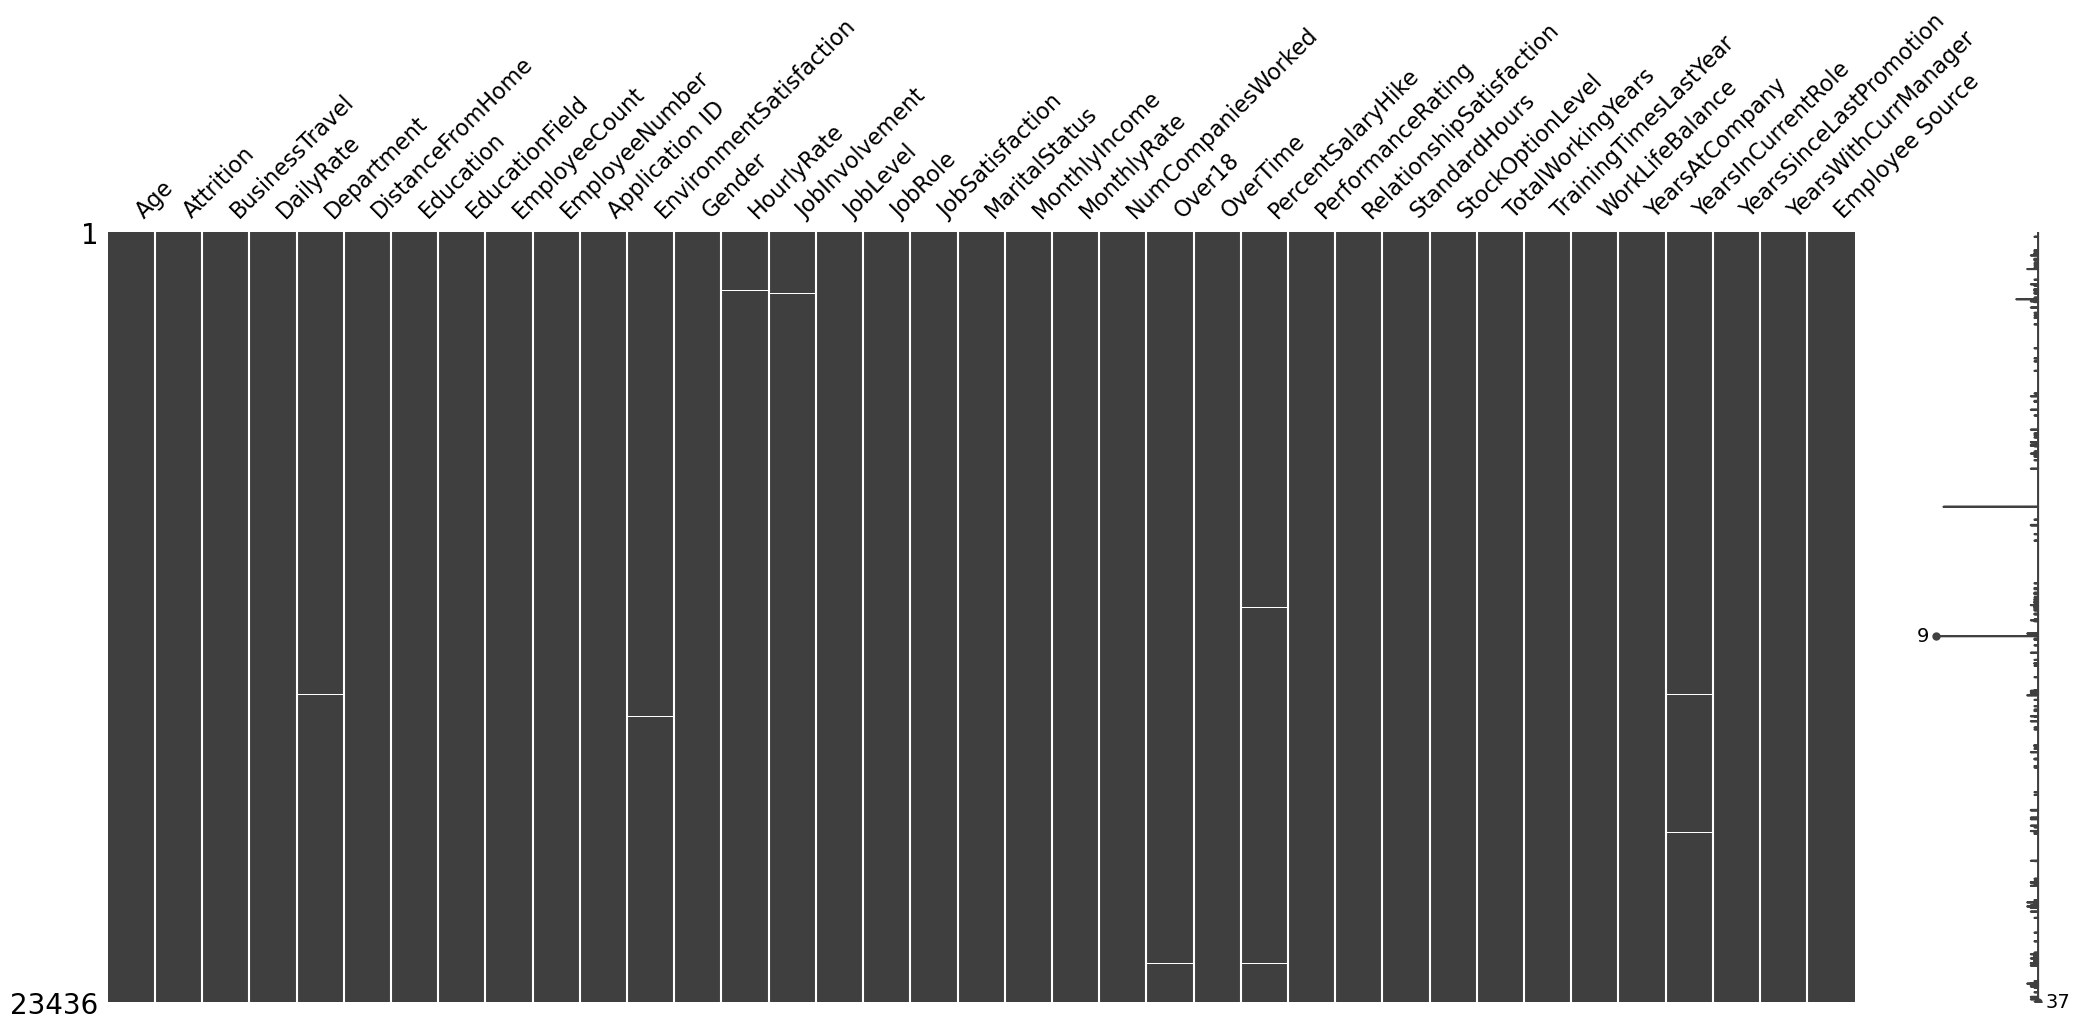

In [339]:
msno.matrix(df)

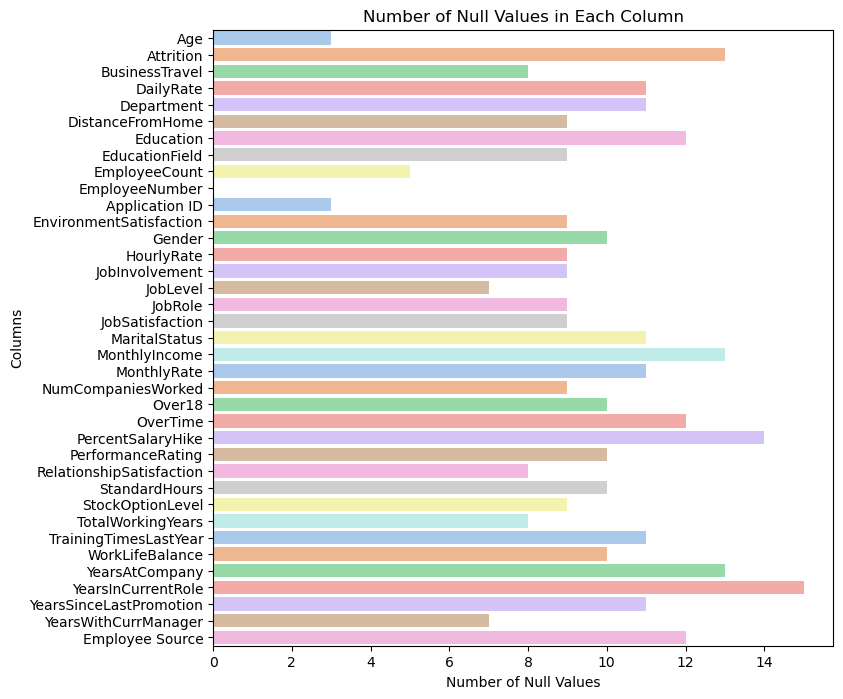

In [340]:
nulls_df = nulls.reset_index()
nulls_df.columns = ['Column', 'Null_Count']

plt.figure(figsize=(8, 8))
sns.barplot(x='Null_Count', y='Column', data=nulls_df, palette='pastel')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.show()

### Outliers Checking :

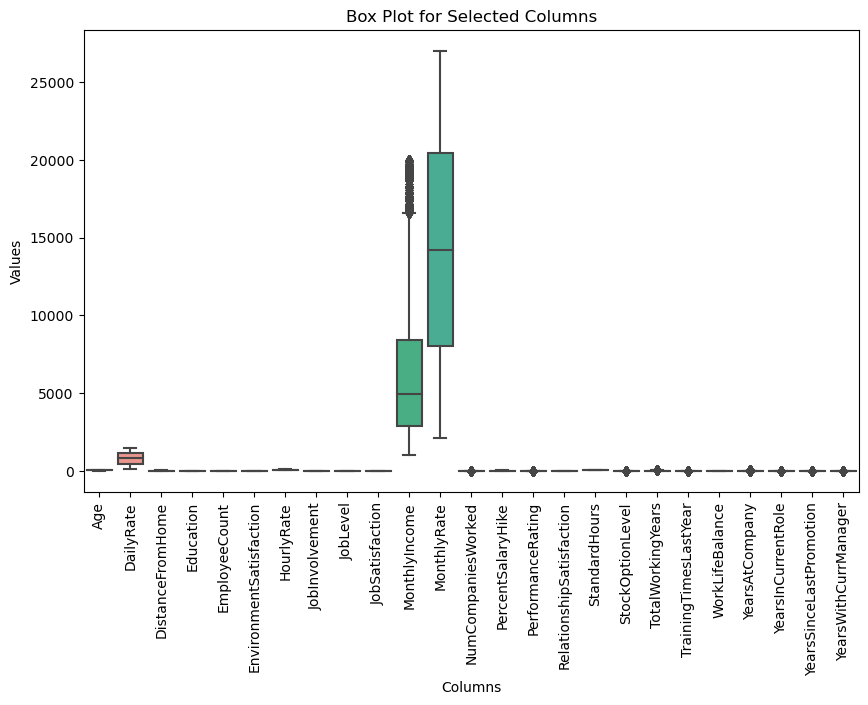

In [341]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cols])
plt.xticks(rotation=90)

plt.title('Box Plot for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

# Data Cleaning :

In [342]:
cols_to_remove = ['EmployeeNumber', 'Application ID']
df = df.drop(columns=cols_to_remove)

In [343]:
nulls

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               0
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [344]:
def fill_mean_na(mean):
    for mn in mean:
        df[mn].fillna(df[mn].mean(),inplace=True)
def fill_mode_na(mode):
    for md in mode:
        df[md].fillna(df[md].mode()[0],inplace=True)
def fill_unknown_na(unknown):
    for un in unknown:
        df[un].fillna("unknown",inplace=True)

In [345]:
df["Age"].fillna(round(df['Age'].mean()),inplace=True)
df["EmployeeCount"].fillna(1,inplace=True)
mean = ["DailyRate","DistanceFromHome","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","PercentSalaryHike","StandardHours","TotalWorkingYears","HourlyRate","MonthlyRate","MonthlyIncome","NumCompaniesWorked"]
fill_mean_na(mean)
mode = ["WorkLifeBalance","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","Education","EnvironmentSatisfaction","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction",]
fill_mode_na(mode)
unknown = ["Department","EducationField","Employee Source","JobRole","BusinessTravel","MaritalStatus","Over18","OverTime","Gender"]
fill_unknown_na(unknown)

nulls_cnt = df.isnull().sum().sum()
if(nulls_cnt==0):
    print("No null values")
else:
    print("There are "+str(nulls_cnt)+" null values to be removed")

There are 13 null values to be removed


In [348]:
dt = df.dropna()

In [349]:
df.shape

(23436, 35)

In [350]:
df.drop_duplicates(inplace=True)
df.shape

(8651, 35)

### Distribution of data :

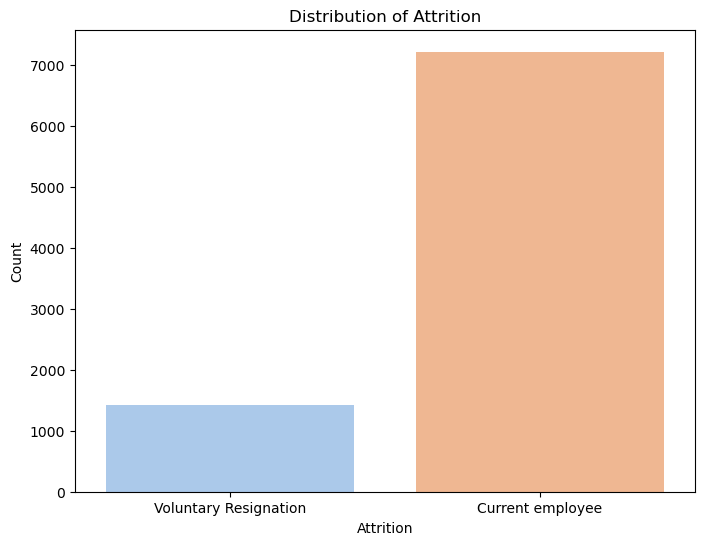

In [351]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df, palette='pastel')

plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.show()

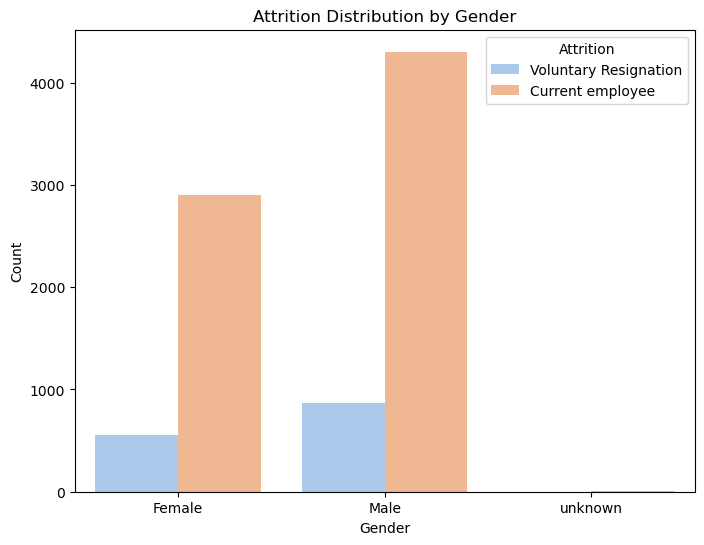

In [352]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel')

plt.title('Attrition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='Age', ylabel='Density'>

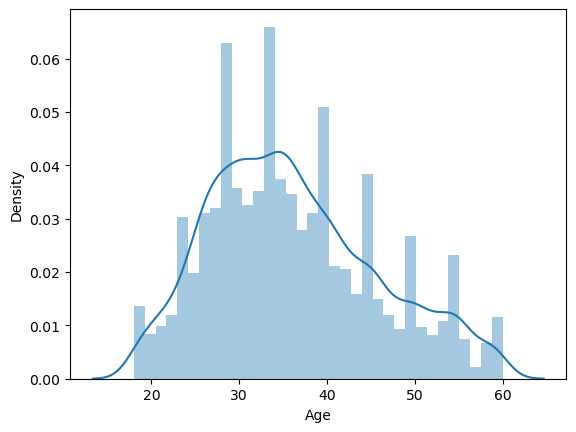

In [353]:
sns.distplot(df['Age'])

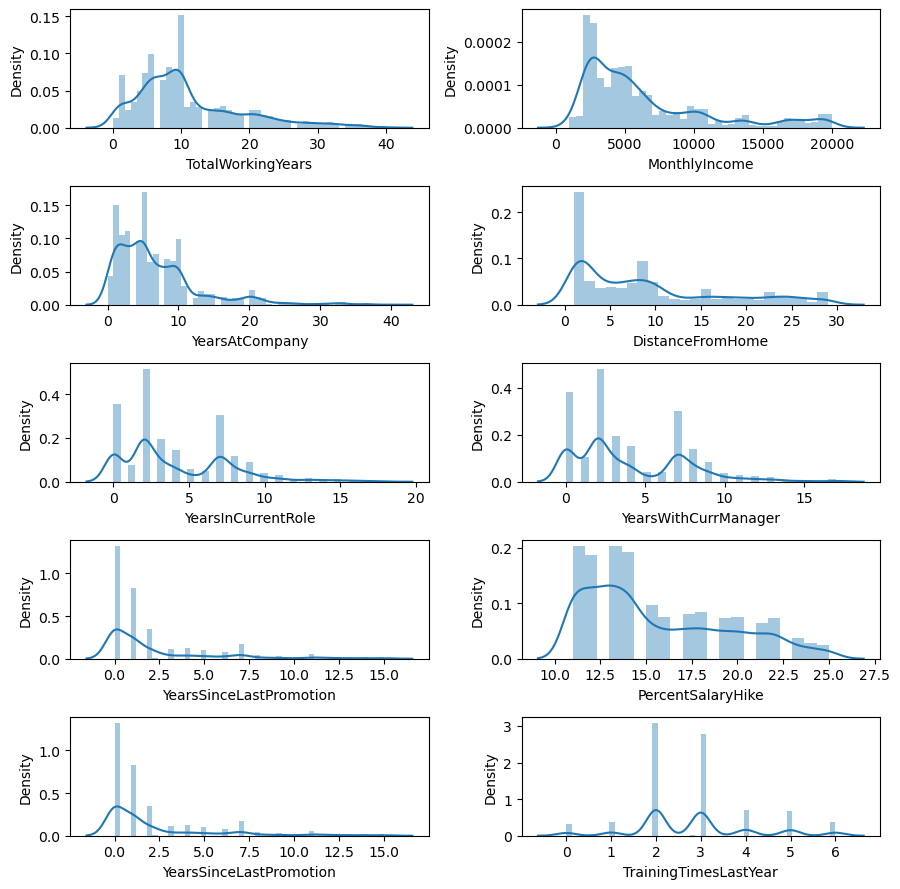

In [354]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [355]:
categorical = df.select_dtypes(include='object').columns.to_list()
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Employee Source']

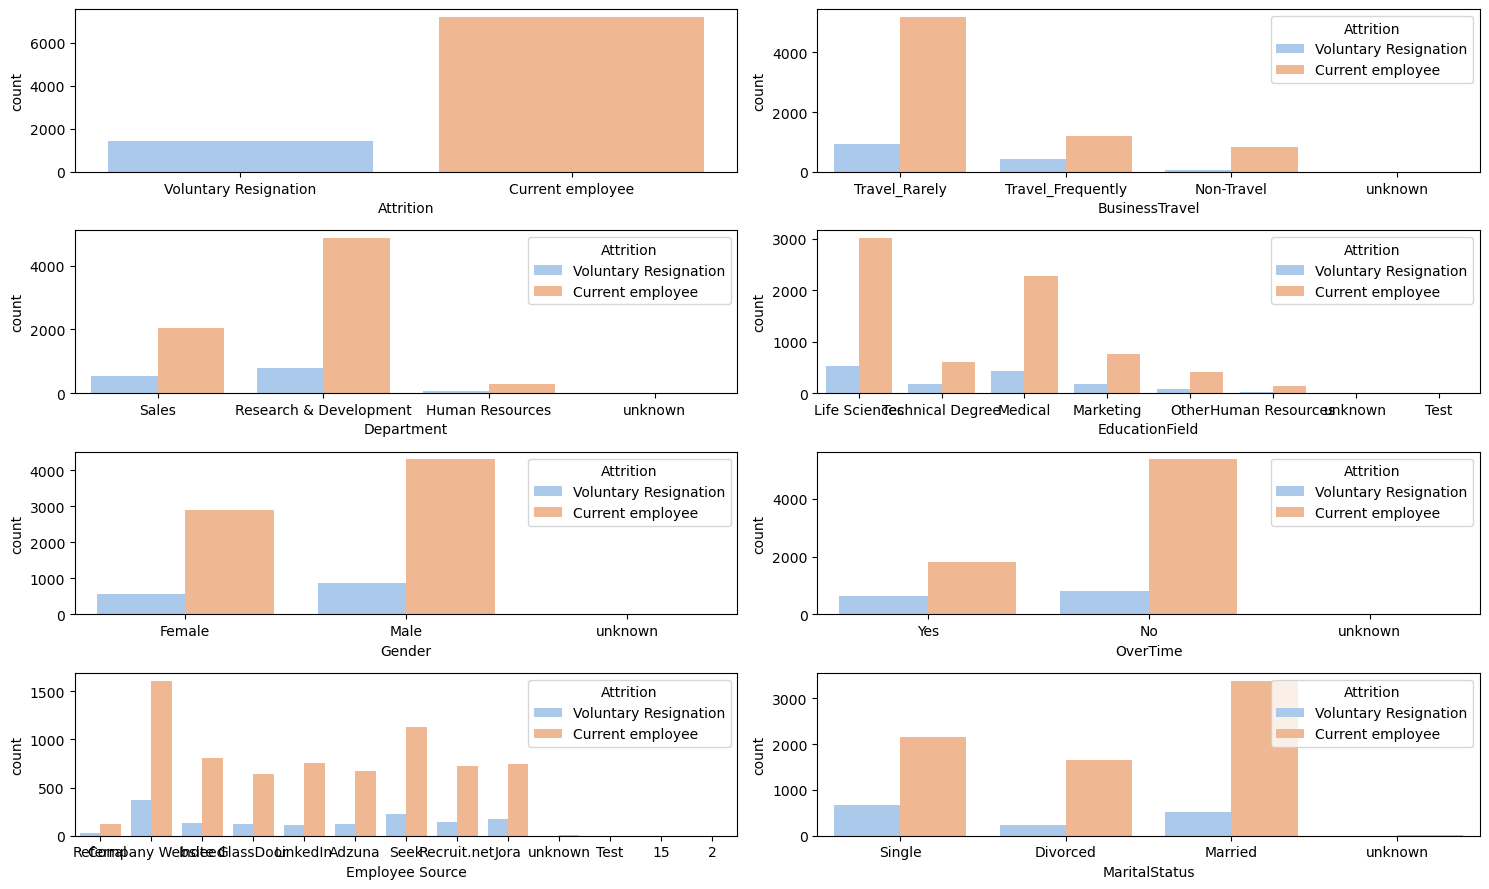

In [356]:
fig, ax = plt.subplots(4, 2, figsize=(15, 9))

sns.countplot(data=df, x='Attrition', palette='pastel', ax=ax[0, 0])
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='pastel', ax=ax[0, 1])
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel', ax=ax[1, 0])
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='pastel', ax=ax[1, 1])
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel', ax=ax[2, 0])
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel', ax=ax[2, 1])
sns.countplot(data=df, x='Employee Source', hue='Attrition', palette='pastel', ax=ax[3, 0])
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='pastel', ax=ax[3, 1])

plt.tight_layout()

plt.show()

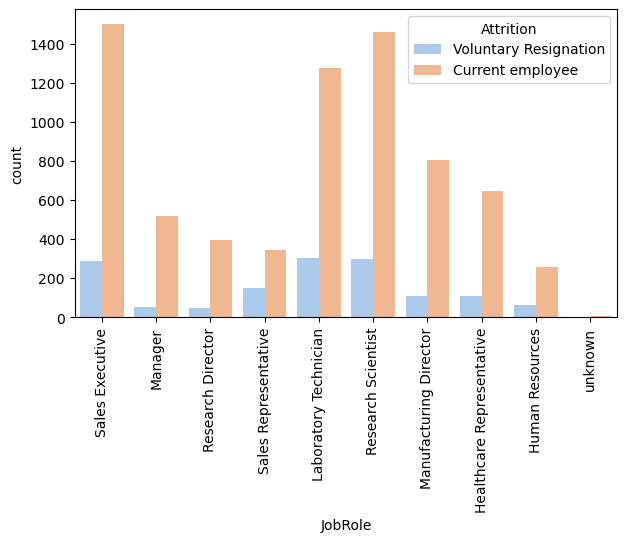

In [357]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='pastel')
plt.xticks(rotation=90)

plt.show()

##### Correlation Matrix :

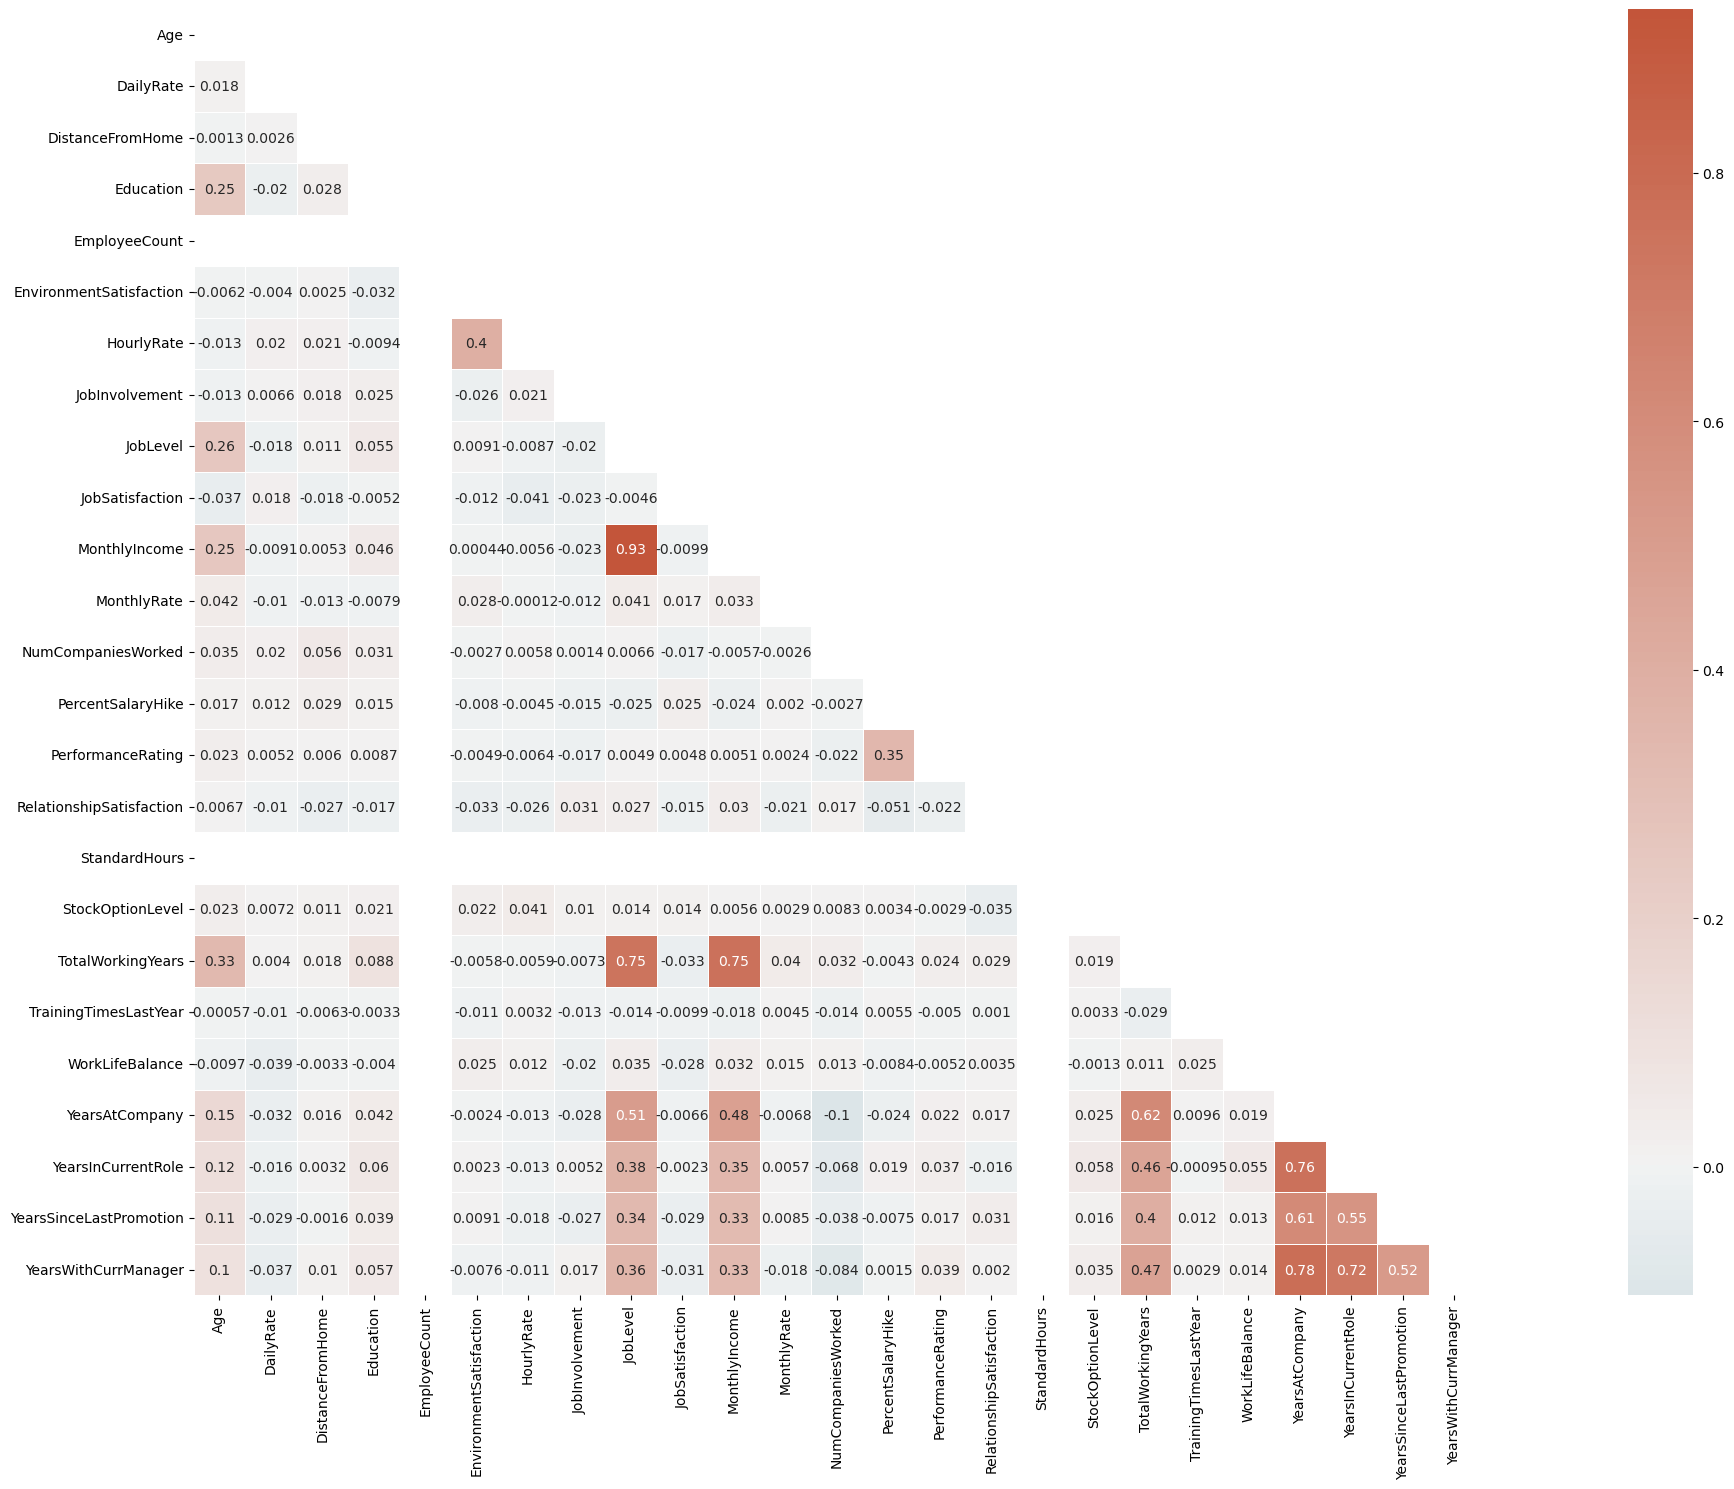

In [358]:
cor_mat = df.corr()
mask = np.triu(np.ones_like(cor_mat, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True, cmap=cmap, center=0, linewidths=.5, ax=ax)

plt.tight_layout()
plt.show()

### Encoding of Data :

In [359]:
dt.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [360]:
unknown.append('Attrition')
label_mappings = {}
dt = df.copy()
LE = LabelEncoder()

for column in unknown:
    dt[column] = LE.fit_transform(dt[column])
    label_mappings[column] = dict(zip(LE.classes_, LE.transform(LE.classes_)))

dt

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,9
1,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,9
5,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,4.0,...,80.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0,3
6,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,1.0,...,80.0,0.0,33.0,5.0,1.0,29.0,8.0,11.0,10.0,5
13,41.0,1,2,1102.0,2,1.0,2.0,1,1.0,1.0,...,80.0,1.0,10.0,2.0,3.0,9.0,7.0,4.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23427,60.0,0,2,370.0,1,1.0,4.0,3,1.0,3.0,...,80.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,3
23428,60.0,0,2,370.0,1,1.0,4.0,1,1.0,3.0,...,80.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,3
23433,37.0,1,1,1009.0,1,1.0,3.0,1,1.0,4.0,...,80.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,2.0,2
23434,37.0,0,2,1354.0,1,5.0,3.0,3,1.0,3.0,...,80.0,0.0,14.0,6.0,3.0,11.0,10.0,5.0,8.0,5


In [361]:
for column, mapping in label_mappings.items():
    print(f"Mappings for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mappings for Department:
  Human Resources: 0
  Research & Development: 1
  Sales: 2
  unknown: 3
Mappings for EducationField:
  Human Resources: 0
  Life Sciences: 1
  Marketing: 2
  Medical: 3
  Other: 4
  Technical Degree: 5
  Test: 6
  unknown: 7
Mappings for Employee Source:
  15: 0
  2: 1
  Adzuna: 2
  Company Website: 3
  GlassDoor: 4
  Indeed: 5
  Jora: 6
  LinkedIn: 7
  Recruit.net: 8
  Referral: 9
  Seek: 10
  Test: 11
  unknown: 12
Mappings for JobRole:
  Healthcare Representative: 0
  Human Resources: 1
  Laboratory Technician: 2
  Manager: 3
  Manufacturing Director: 4
  Research Director: 5
  Research Scientist: 6
  Sales Executive: 7
  Sales Representative: 8
  unknown: 9
Mappings for BusinessTravel:
  Non-Travel: 0
  Travel_Frequently: 1
  Travel_Rarely: 2
  unknown: 3
Mappings for MaritalStatus:
  Divorced: 0
  Married: 1
  Single: 2
  unknown: 3
Mappings for Over18:
  Y: 0
  unknown: 1
Mappings for OverTime:
  No: 0
  Yes: 1
  unknown: 2
Mappings for Gender:
  Female:

### Feature Scaling :

In [362]:
non_numeric_cols = dt.select_dtypes(include=['object']).columns.tolist()

def convert_to_float(column):
    try:
        return column.astype(float)
    except ValueError:
        return column  

dt = dt.apply(lambda col: convert_to_float(col) if col.name not in non_numeric_cols else col)
dt.dtypes

Age                         float64
Attrition                   float64
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                      float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                      float64
OverTime                    float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [363]:
attrition = dt['Attrition']
data_to_scale = dt.drop(columns=['Attrition'])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_dt = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

scaled_dt['Attrition'] = attrition.values
dt = scaled_dt
dt.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,Attrition
0,0.547619,0.666667,0.71582,0.666667,0.0,0.25,0.142857,0.0,0.333333,0.0,...,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.750000,1.0
1,0.547619,0.666667,0.71582,0.666667,0.0,0.25,0.142857,0.0,0.333333,0.0,...,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.750000,1.0
2,0.547619,0.666667,0.71582,0.666667,0.0,0.25,0.142857,0.0,1.000000,0.0,...,1.000000,0.525,0.333333,0.666667,0.125,0.000000,0.000000,0.117647,0.250000,1.0
3,0.547619,0.666667,0.71582,0.666667,0.0,0.25,0.142857,0.0,0.000000,0.0,...,0.000000,0.825,0.833333,0.000000,0.725,0.444444,0.733333,0.588235,0.416667,1.0
4,0.547619,0.666667,0.71582,0.666667,0.0,0.25,0.142857,0.0,0.000000,0.5,...,0.333333,0.250,0.333333,0.666667,0.225,0.388889,0.266667,0.117647,0.250000,1.0


In [364]:
#dt.to_csv("Encoded Dataset.csv",index=False)

### Feature Selection :

In [424]:
dt=pd.read_csv("Encoded Dataset.csv")
dt

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,Attrition
0,0.547619,0.666667,0.715820,0.666667,0.000000,0.25,0.142857,0.0,0.333333,0.0,...,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.750000,1.0
1,0.547619,0.666667,0.715820,0.666667,0.000000,0.25,0.142857,0.0,0.333333,0.0,...,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.750000,1.0
2,0.547619,0.666667,0.715820,0.666667,0.000000,0.25,0.142857,0.0,1.000000,0.0,...,1.000000,0.525,0.333333,0.666667,0.125,0.000000,0.000000,0.117647,0.250000,1.0
3,0.547619,0.666667,0.715820,0.666667,0.000000,0.25,0.142857,0.0,0.000000,0.0,...,0.000000,0.825,0.833333,0.000000,0.725,0.444444,0.733333,0.588235,0.416667,1.0
4,0.547619,0.666667,0.715820,0.666667,0.000000,0.25,0.142857,0.0,0.000000,0.5,...,0.333333,0.250,0.333333,0.666667,0.225,0.388889,0.266667,0.117647,0.250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,1.000000,0.666667,0.191840,0.333333,0.000000,0.75,0.428571,0.0,0.666667,0.5,...,0.333333,0.500,0.333333,0.666667,0.500,0.388889,0.133333,0.764706,0.250000,0.0
8647,1.000000,0.666667,0.191840,0.333333,0.000000,0.75,0.142857,0.0,0.666667,0.5,...,0.333333,0.475,0.333333,1.000000,0.025,0.000000,0.000000,0.000000,0.250000,0.0
8648,0.452381,0.333333,0.649248,0.333333,0.000000,0.50,0.142857,0.0,1.000000,0.5,...,0.666667,0.100,0.333333,0.333333,0.050,0.055556,0.133333,0.117647,0.166667,1.0
8649,0.452381,0.666667,0.896206,0.333333,0.142857,0.50,0.428571,0.0,0.666667,0.0,...,0.000000,0.350,1.000000,0.666667,0.275,0.555556,0.333333,0.470588,0.416667,0.0


In [425]:
cols=dt.columns.tolist()
if 'Attrition' in cols:
    cols.remove('Attrition')
cols

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Employee Source']

In [426]:
target_variable = 'Attrition'

X = dt[cols]
y = dt[target_variable]
estimator = DecisionTreeClassifier(random_state=42)

mean_scores = []
selected_features = []

for n_features in range(1, X.shape[1] + 1):
    rfe = RFE(estimator, n_features_to_select=n_features)
    rfe.fit(X, y)
    scores = cross_val_score(rfe, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    selected_indices = rfe.support_
    selected_features.append(list(X.columns[selected_indices]))


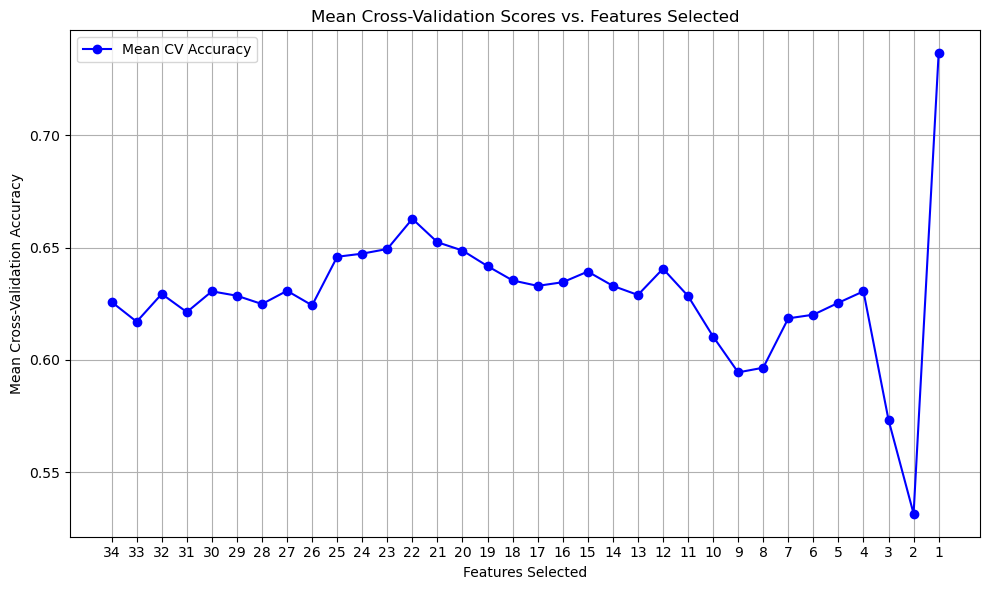

In [427]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), mean_scores, marker='o', linestyle='-', color='b', label='Mean CV Accuracy')
plt.title('Mean Cross-Validation Scores vs. Features Selected')
plt.xlabel('Features Selected')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(np.arange(1, X.shape[1] + 1))
plt.gca().invert_xaxis()  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Optimal Feature Count**: The highest stable accuracy occurs when 21 features are selected, making it the optimal choice for the best modeling.





**Stability**: The mean cross-validation accuracy is relatively high and consistent around 21 features, indicating a stable model performance with this feature count


In [428]:
top_21_features = selected_features[20]  # Select the 21st set of selected features (index 20)

print("Top 21st Set of Selected Features:")
print(top_21_features)


Top 21st Set of Selected Features:
['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Employee Source']


In [429]:
features = top_21_features + ["Attrition"]
print("Updated Features List with Attrition:")
print(features)

Updated Features List with Attrition:
['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Employee Source', 'Attrition']


In [430]:
df_modelling = dt[features]
df_modelling

,Age,DailyRate,Department,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Employee Source,Attrition
0,0.547619,0.715820,0.666667,0.000000,0.25,0.914286,0.666667,0.777778,1.000000,0.262454,...,0.000000,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.750000,1.0
1,0.547619,0.715820,0.666667,0.000000,0.25,0.914286,0.666667,0.777778,1.000000,0.262454,...,0.000000,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.750000,1.0
2,0.547619,0.715820,0.666667,0.000000,0.25,0.042857,0.666667,0.333333,0.666667,0.723907,...,0.214286,0.666667,1.000000,0.525,0.333333,0.125,0.000000,0.000000,0.250000,1.0
3,0.547619,0.715820,0.666667,0.000000,0.25,0.157143,0.666667,0.333333,0.000000,0.977199,...,0.000000,1.000000,0.000000,0.825,0.833333,0.725,0.444444,0.733333,0.416667,1.0
4,0.547619,0.715820,0.666667,0.000000,0.25,0.128571,0.666667,0.777778,0.333333,0.306266,...,0.000000,1.000000,0.333333,0.250,0.333333,0.225,0.388889,0.266667,0.250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,1.000000,0.191840,0.333333,0.000000,0.75,0.885714,0.000000,0.000000,1.000000,0.519958,...,0.642857,0.666667,0.333333,0.500,0.333333,0.500,0.388889,0.133333,0.250000,0.0
8647,1.000000,0.191840,0.333333,0.000000,0.75,0.885714,0.000000,0.000000,1.000000,0.519958,...,0.642857,0.666667,0.333333,0.475,0.333333,0.025,0.000000,0.000000,0.250000,0.0
8648,0.452381,0.649248,0.333333,0.000000,0.50,0.757143,0.666667,0.777778,0.666667,0.226014,...,0.285714,0.666667,0.666667,0.100,0.333333,0.050,0.055556,0.133333,0.166667,1.0
8649,0.452381,0.896206,0.333333,0.142857,0.50,0.214286,0.333333,0.333333,0.000000,0.559347,...,0.071429,1.000000,0.000000,0.350,1.000000,0.275,0.555556,0.333333,0.416667,0.0


In [431]:
# df_modelling.to_csv("Modelling Dataset.csv",index=False)

## Modelling :

In [447]:
dp=pd.read_csv("Modelling Dataset.csv")
dp

,Age,DailyRate,Department,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Employee Source,Attrition
0,0.547619,0.715820,0.666667,0.000000,0.25,0.914286,0.666667,0.777778,1.000000,0.262454,...,0.000000,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.750000,1.0
1,0.547619,0.715820,0.666667,0.000000,0.25,0.914286,0.666667,0.777778,1.000000,0.262454,...,0.000000,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.750000,1.0
2,0.547619,0.715820,0.666667,0.000000,0.25,0.042857,0.666667,0.333333,0.666667,0.723907,...,0.214286,0.666667,1.000000,0.525,0.333333,0.125,0.000000,0.000000,0.250000,1.0
3,0.547619,0.715820,0.666667,0.000000,0.25,0.157143,0.666667,0.333333,0.000000,0.977199,...,0.000000,1.000000,0.000000,0.825,0.833333,0.725,0.444444,0.733333,0.416667,1.0
4,0.547619,0.715820,0.666667,0.000000,0.25,0.128571,0.666667,0.777778,0.333333,0.306266,...,0.000000,1.000000,0.333333,0.250,0.333333,0.225,0.388889,0.266667,0.250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,1.000000,0.191840,0.333333,0.000000,0.75,0.885714,0.000000,0.000000,1.000000,0.519958,...,0.642857,0.666667,0.333333,0.500,0.333333,0.500,0.388889,0.133333,0.250000,0.0
8647,1.000000,0.191840,0.333333,0.000000,0.75,0.885714,0.000000,0.000000,1.000000,0.519958,...,0.642857,0.666667,0.333333,0.475,0.333333,0.025,0.000000,0.000000,0.250000,0.0
8648,0.452381,0.649248,0.333333,0.000000,0.50,0.757143,0.666667,0.777778,0.666667,0.226014,...,0.285714,0.666667,0.666667,0.100,0.333333,0.050,0.055556,0.133333,0.166667,1.0
8649,0.452381,0.896206,0.333333,0.142857,0.50,0.214286,0.333333,0.333333,0.000000,0.559347,...,0.071429,1.000000,0.000000,0.350,1.000000,0.275,0.555556,0.333333,0.416667,0.0


In [448]:
X = dp.drop(columns=['Attrition']).values
Y = dp['Attrition'].values

In [449]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

##### Imbalanced dataset balancing:

In [450]:
oversampler = SMOTE(random_state=42)
x_train_smote, y_train_smote = oversampler.fit_resample(x_train, y_train)

#### Building model and predictions:

In [456]:
def compare(model, x_train, y_train, x_test, y_test):
    clf = model
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='weighted', zero_division=0) 
    rec = recall_score(y_test, pred, average='weighted', zero_division=0)  
    auroc = roc_auc_score(y_test, clf.predict_proba(x_test), average='weighted', multi_class='ovr') 
    return acc, prec, rec, auroc

In [457]:
acc_list = []
prec_list = []
rec_list = []
auroc_list = []

models = [
    SVC(kernel='rbf', random_state=42, probability=True),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

model_names = ['rbfSVM', 'RandomForestClassifier', 'GradientBoostingClassifier']

for model, name in zip(models, model_names):
    acc, prec, rec, auroc = compare(model, x_train_smote, y_train_smote, x_test, y_test)
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    auroc_list.append(auroc)

met_df = pd.DataFrame({
    'Modelling Algo': model_names,
    'Accuracy': acc_list,
    'Precision': prec_list,
    'Recall': rec_list,
    'Area Under ROC Curve': auroc_list
})

met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.832178,0.868985,0.832178,0.863713
1,RandomForestClassifier,0.974110,0.974862,0.974110,0.990884
2,GradientBoostingClassifier,0.852982,0.854127,0.852982,0.841779


### Conclusions

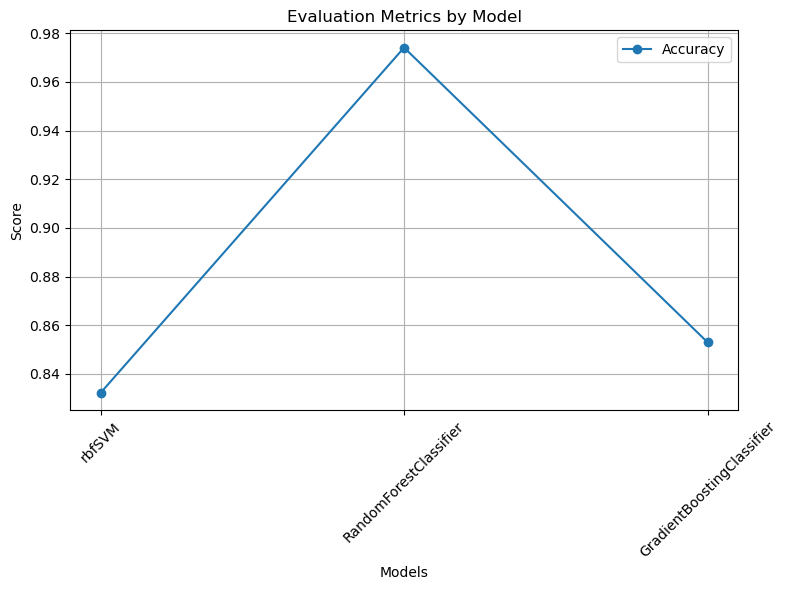

In [468]:
plt.figure(figsize=(8, 6))

plt.plot(met_df['Modelling Algo'], met_df['Accuracy'], marker='o', label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

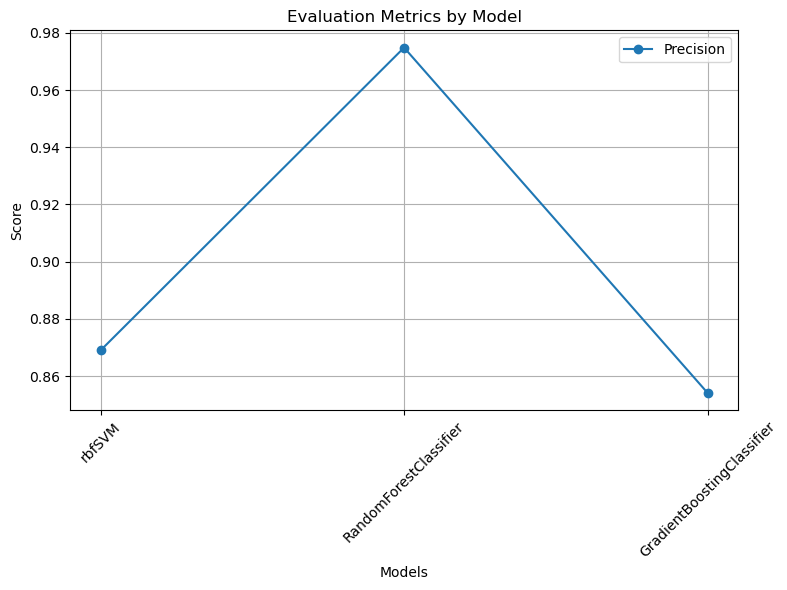

In [467]:
plt.figure(figsize=(8, 6))
plt.plot(met_df['Modelling Algo'], met_df['Precision'], marker='o', label='Precision')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

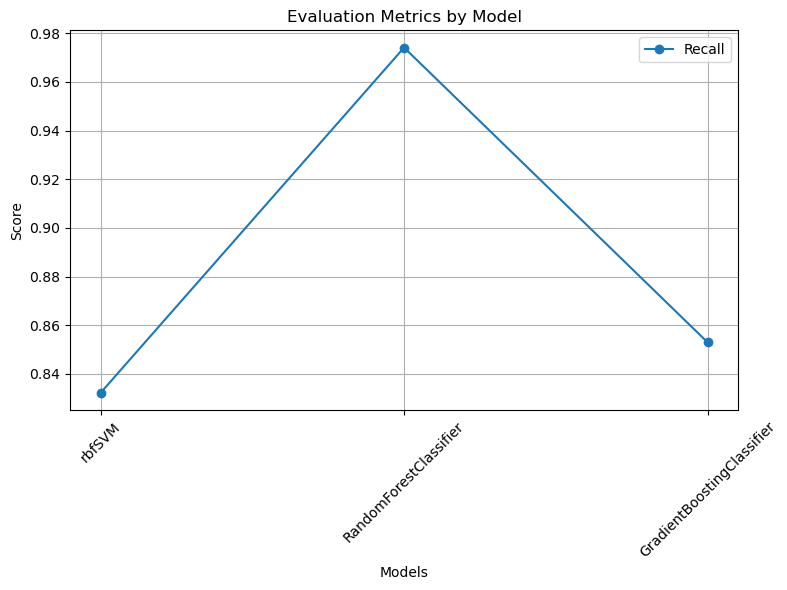

In [466]:
plt.figure(figsize=(8, 6))
plt.plot(met_df['Modelling Algo'], met_df['Recall'], marker='o', label='Recall')


plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

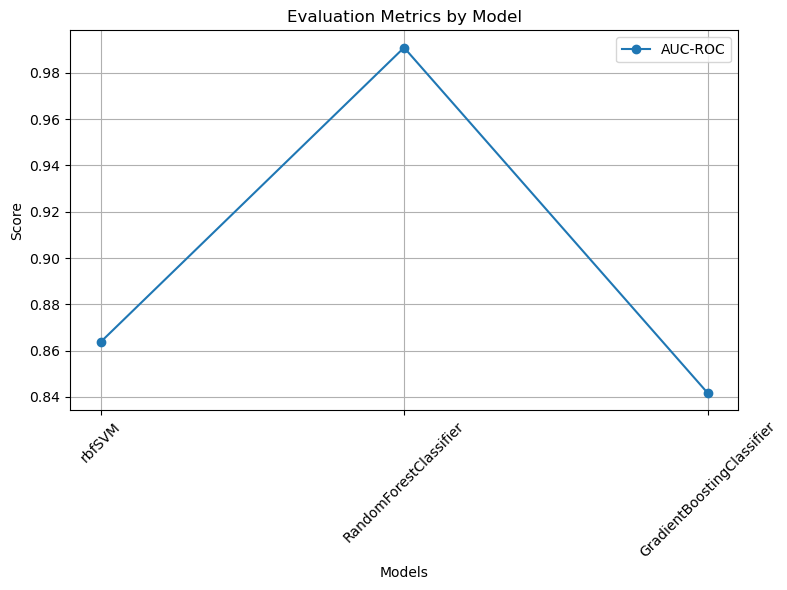

In [465]:
plt.figure(figsize=(8, 6))
plt.plot(met_df['Modelling Algo'], met_df['Area Under ROC Curve'], marker='o', label='AUC-ROC')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

**RandomForestClassifier** is recommended due to its superior performance across all metrics, indicating its effectiveness in this classification task.
**rbfSVM** and **GradientBoostingClassifier** can still be considered viable alternatives, especially if interpretability or computational efficiency is a priority, but they do not match the performance of RandomForestClassifier in this scenario.